# Project: Investigate a Dataset: No-show appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This study focuses on some thought-provoking concerns about whether or not patients show up for their visits, using data from 110k+ medical appointments in Brazil.

#### Data Dictionary

A number of characteristics about the patient are included in each row.

01 - PatientId -> Identification of a patient

02 - AppointmentID -> Identification of each appointment

03 - Gender -> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - ScheduledDay -> The day of the actual appointment, when they have to visit the doctor/tells us on what day the patient set up their appointment.

05 -AppointmentDay -> The day someone called or registered the appointment, this is before appointment of course.

06 - Age -> How old is the patient.

07 - Neighbourhood -> Where the appointment takes place/ indicates the location of the hospital.

08 - Scholarship -> True of False, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

09 - Hipertension -> True or False

10 - Diabetes -> True or False

11 - Alcoholism -> True or False

12 - Handcap -> True or False

13 - SMS_received -> 1 or more messages sent to the patient.

14 - No-show -> True or False.






### Question(s) for Analysis

**Q1:** What information do we need to know to anticipate if a patient will show up for their planned appointment?

**Q2:** Is it true that receiving an SMS as a reminder influences whether or not a patient shows up?

**Q3:** In comparison to women, how often do males visit hospitals? Which one is most likely to appear?

**Q4:** What factors are directly associated with aging?


In [53]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

In [54]:
# Load data and print out a few lines. Perform operations to
# inspect data types and look for instances of missing or possibly errant data.

# Read the dataset using the pandas module
df = pd.read_csv('proj.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [55]:
df.info() # "Scholarship," "Hipertension," "Diabetes," "Alcoholism," "Handcap," and "SMS received" are all encoded as zeros and ones, 
            # which is why they have an int64 type and seem as a continuous data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### Since all non-null values are the same as the count of entries, hence there is no need to check for the number of null values

In [56]:
 # Check for duplicate rows in the dataset.
sum(df.duplicated()) # There are no duplicated rows

0

In [57]:
# For consistency,I need to determine the structure of the dataset, 
# the number of non-null values, and the datatypes of each column
df.shape

(110527, 14)

In [58]:
# Now I remove the columns from the dataset that are no longer needed.
df.drop(df.columns[[0,1]],axis=1,inplace=True)

df # Sucessfully removed 'PatientID and AppointmentID'

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [59]:
# Dates in  are converted from objects to datetime datatype.
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

df.head(10) # View Dataset

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [60]:
# I will now create a new column (time_diff) for the period between the ScheduledDay and the AppointmentDay.
df['time_diff'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_diff
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [61]:
df['time_duration'] = (df.AppointmentDay.dt.date) - (df.ScheduledDay.dt.date)

In [62]:
df['time_duration'] = df.time_duration.dt.days


### Data Cleaning
 

###### Column labels are written in lower case letters, and hyphens are replaced with underscores.

In [63]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

>- To see their statistical features, I need transform categorical values to quantitative values (0,1).

In [64]:
# Columns no_show and gender needs to be in binary values 0 and 1 indicating that:

df['gender'] = df['gender'].map({'M':1, 
                                 'F':0})
df['no_show'] = df['no_show'].map({'Yes':1, 
                                   'No':0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  int64              
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hipertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handcap         110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no_show         110527 non-null  int64              
 12  time_diff       110527 non-null  int64              
 13  time_duration 

In [65]:
df # Observe the change 

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_diff,time_duration
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,0
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,0
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,0
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,0
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34,35
110523,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34,35
110524,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40,41
110525,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40,41


###### Correct wrongly spelt words

In [66]:
df.rename(columns={'hipertension':'hypertension'}, inplace=True)
df.rename(columns={'handcap': 'handicapped'}, inplace=True)

df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,time_diff,time_duration
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,0
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,0
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,0
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,0
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,0


Below is the split of values in 'No-show': 0 = showed up and 1 = didn't show up: 

0    88208
1    22319
Name: no_show, dtype: int64

 Out of 110527 records, 22319 didn't show up, i.e. 20.19 %


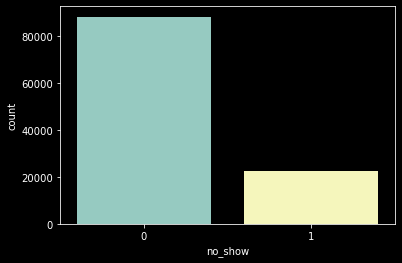

In [67]:
def no_show_class():
    '''Count the values of No-show to spot whether classes are imbalanced or not'''
    no_show = 0
    for value in df['no_show']:
        if value == 1:
            no_show += 1
    print ("\n Out of", len(df['no_show']), "records,", no_show, "didn't show up, i.e.", round(float(no_show) / float(len(df['no_show'])), 4)*100,"%")

print ("Below is the split of values in 'No-show': 0 = showed up and 1 = didn't show up: \n")
print (df['no_show'].value_counts())
sns.countplot(x='no_show', data=df)

no_show_class() # 79.8% arrived on their appointed date

Outlier Removal

In [68]:
# From Column age
print ("Age range: ", sorted(df['age'].unique()))

Age range:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [69]:
# Only keep records of patients where they are between 0-90 in age to remove outliers.
df = df[(df.age >= 0) & (df.age <= 90)]

min_age = df['age'].min()
max_age = df['age'].max()
print ("Age now ranges from: {} to {}.".format(min_age, max_age)) # Successfully Changed

Age now ranges from: 0 to 90.


Text(0.5, 1.0, 'Distribution of Age')

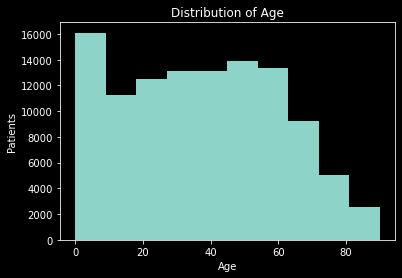

In [70]:
# Distribution of 'Age'
plt.figure();
age_hist = df['age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age') # Ages above 80 years are fewer than all other age categories

Distribution of patients by Gender: 

Female: 71619 
Male: 38599


Text(0.5, 1.0, 'Distribution of Gender')

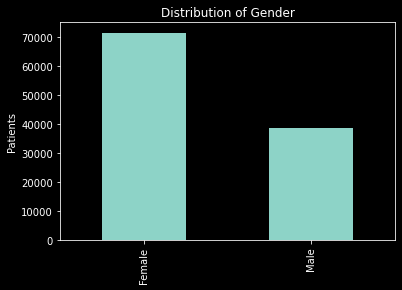

In [71]:
# Gender Division
print ("Distribution of patients by Gender: \n")
print ("Female: {} \nMale: {}".format(df['gender'].value_counts()[0], df['gender'].value_counts()[1]) )

# Gender Distribution plot
gender_bar = df['gender'].value_counts().plot.bar()
gender_bar.set_xticklabels(["Female", "Male"])
gender_bar.set_ylabel("Patients")
gender_bar.set_title('Distribution of Gender') # Female count is higher than male

<a id='eda'></a>
## Exploratory Data Analysis

Now that i've trimmed and cleaned your data, I'm ready to move on to exploration. I will **Compute statistics** and **create visualizations** with the goal of addressing the research questions posed in the Introduction section. 

### Research Question 1 (What information do we need to know to anticipate if a patient will show up for their planned appointment?)

#### age vs noshow

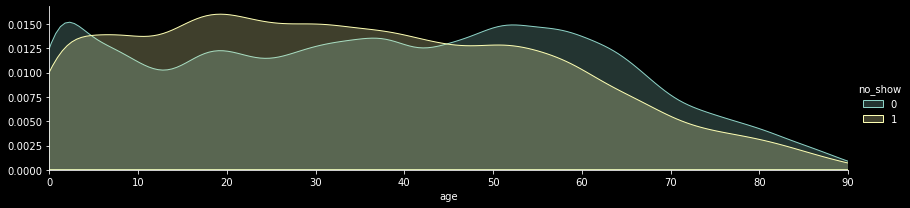

In [72]:
a = sns.FacetGrid(df, hue = 'no_show', aspect=4 )
a.map(sns.kdeplot, 'age', shade= True )
a.set(xlim=(0, df['age'].max()))
a.add_legend() # The higher the age the more they are likely to show up

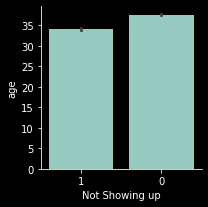

In [73]:
sns.FacetGrid(df).map(sns.barplot, "no_show", "age", order=[1,0])
plt.xlabel('Not Showing up')
plt.ylabel('age')
plt.show()

To better understand the age category and their showing up for appointment or not, we can divide their ages into categories

In [74]:
# I can specify that:
# child(<13), teen(>=13), early_adulthood(20-29), adulthood(30-39), middle_age(40-59), early_elder(60-69), elders(>=70)

# Create a function 
'''
Takes in four values:

data : It takes the original value that will be divided by it
rows : She takes the name of the column that will take a lifetime
l1 : the lower bound of the column.
l2 : the upper bound of the column


Gives Out:

a new dataframe with all columns in the original one but only the rows which meet the condition.

'''
def age(data, rows, l1, l2):

    if l2 < l1 :
        l1 , l2 = l2 , l1
            
    return data.query(f"{l1} <= {rows} <= {l2}")

In [75]:
childs = df.query('age < 13')
teens = df.query('age >= 13')
early_adults = age(df,'age',20,29)
adults = age(df,'age',30,39)
middle_aged = age(df,'age',40,59)
early_elders = age(df,'age',60,69)
elders = df.query('age >= 70')


In [76]:
mean_childs = childs['no_show'].mean()
mean_teens = teens['no_show'].mean()
mean_early_adulthood = early_adults['no_show'].mean()
mean_adulthood = adults['no_show'].mean()
mean_middle_age = middle_aged['no_show'].mean()
mean_early_elder = early_elders['no_show'].mean()
mean_elders = elders['no_show'].mean()

Pie Chart with Seaborn

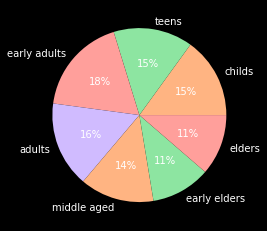

In [77]:
data = [mean_childs, mean_teens, mean_early_adulthood, mean_adulthood, mean_middle_age, mean_early_elder, mean_elders]
labels = ['childs', 'teens', 'early adults', 'adults', 'middle aged', 'early elders', 'elders']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[1:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Barplots with Seaborn

In [78]:
labels = ['childs', 'teens', '20-29', '30-39', '40-59', '60-69', 'elders']
data_list = [labels, data]
bar = pd.DataFrame(data_list).transpose()
bar.columns = ['category', 'mean_age']


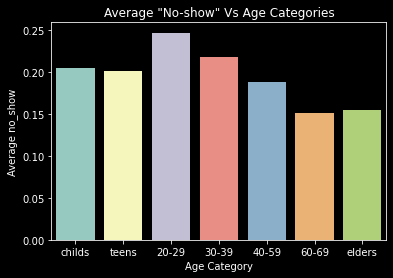

In [79]:
sns.barplot(data = bar, x="category", y="mean_age")
plt.title('Average "No-show" Vs Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Average no_show')
plt.show()

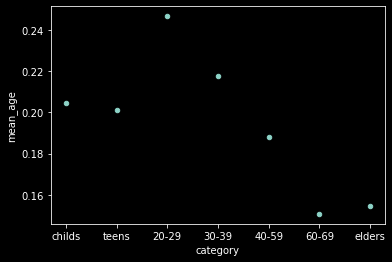

In [80]:
bar.plot(x="category", y="mean_age", kind="scatter");

Outcome:

>- From the visualisations we can come to the conclusion that early_elders(60-69) and elders, are committed to appointments than others did not show up the most 

>- And no the question arises: why? 
Is it because they did not receive any mail? Let us examine the reason with the next parameters below

### Research Question 2  (Is it true that receiving an SMS as a reminder influences whether or not a patient shows up?)

##### sms received vs noshow 

In [81]:
df.corrwith(df['no_show'])

gender          -0.003910
age             -0.060934
scholarship      0.029177
hypertension    -0.036112
diabetes        -0.015193
alcoholism      -0.000198
handicapped     -0.006314
sms_received     0.126741
no_show          1.000000
time_diff        0.186709
time_duration    0.186709
dtype: float64

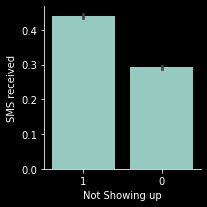

In [82]:
sns.FacetGrid(df).map(sns.barplot, "no_show", "sms_received", order=[1,0]);
plt.xlabel('Not Showing up')
plt.ylabel('SMS received')
plt.show() # Many received SMS but did not still respond

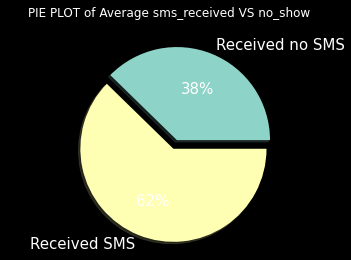

In [83]:
data = df.groupby(['sms_received'])['no_show'].mean()
plt.pie(data,labels=["Received no SMS","Received SMS"],
        explode=[0,0.1],autopct='%.0f%%',shadow=True,textprops={'fontsize':15})
plt.suptitle('PIE PLOT of Average sms_received VS no_show')
plt.ylabel(None)
plt.axis('equal')
plt.show(); 

Outcome:

>- From the visualisations we can come also observe that few received an SMS for an Appointment. But 62% of the population received SMS.

>- Let us check if the ages that received an SMS attended or did not.

In [84]:
# SMS RECEIVED BY CHILDREN
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']<13)]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] <13)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')

No-show percentage with SMS is 28.76, while 17.04 without SMS.


In [85]:
# SMS RECEIVED BY TEENS
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']>=13) & (df['age'] < 20)]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] >=13) & (df['age'] < 20)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')


No-show percentage with SMS is 35.65, while 21.83 without SMS.


In [86]:
# SMS RECEIVED BY EARLY ADULTS
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']>=20) & (df['age'] <=29 )]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] >=20) & (df['age'] <= 29)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')


No-show percentage with SMS is 35.31, while 18.99 without SMS.


In [87]:
# SMS RECEIVED BY ADULTS
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']>=30) & (df['age'] <=39 )]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] >=30) & (df['age'] <= 39)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')


No-show percentage with SMS is 30.99, while 17.09 without SMS.


In [88]:
# SMS RECEIVED BY MIDDLE AGED
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']>=40) & (df['age'] <=59 )]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] >=40) & (df['age'] <= 59)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')

No-show percentage with SMS is 24.70, while 15.86 without SMS.


In [89]:
# SMS RECEIVED BY EARLY ELDERS
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']>=60) & (df['age'] <=69 )]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] >=60) & (df['age'] <= 69)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')

No-show percentage with SMS is 18.47, while 13.37 without SMS.


In [90]:
# SMS RECEIVED BY ELDERS
SMS_received = df.loc[(df['sms_received'] == 1 ) & (df['age']>=70)]['no_show'].mean()
SMS_Not_received = df.loc[(df['sms_received']== 0 ) & (df['age'] >=70)]['no_show'].mean()

print(f'No-show percentage with SMS is {SMS_received*100:.2f}, while {SMS_Not_received*100:.2f} without SMS.')

No-show percentage with SMS is 20.33, while 13.49 without SMS.


Outcome:
>- Finally we can come to the conclusion from teens received more SMS than the rest, from early_elders(60-69) and elders data; 13% or 14% did not receive SMS. But still showed up for their appointments. Showing that they are more concerned about their health than the rest.

>- From all categories we can see that the percentage of those that did not show up despite receiving an SMS is higher that those who did not received and not respond 

>- Hence, SMS is a factor that determines attendance. If more had received SMS they would have showed up for their appointment.

##### time difference vs noshow

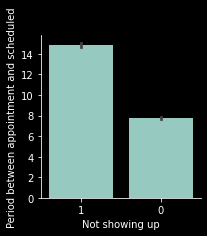

In [91]:
sns.FacetGrid(df).map(sns.barplot, "no_show", "time_diff", order=[1,0]);
plt.xlabel('Not showing up')
plt.ylabel('Period between appointment and scheduled')
plt.show()

### Research Question 3 (In comparison to women, how often do males visit hospitals? Which one is most likely to appear?)

In [92]:
g = df.groupby(['gender','no_show']).count()
g.head() # Where 0 rep Male and 1 rep Female

scheduledday  appointmentday    age  neighbourhood  \
gender no_show                                                       
0      0               57074           57074  57074          57074   
       1               14545           14545  14545          14545   
1      0               30887           30887  30887          30887   
       1                7712            7712   7712           7712   

                scholarship  hypertension  diabetes  alcoholism  handicapped  \
gender no_show                                                                 
0      0              57074         57074     57074       57074        57074   
       1              14545         14545     14545       14545        14545   
1      0              30887         30887     30887       30887        30887   
       1               7712          7712      7712        7712         7712   

                sms_received  time_diff  time_duration  
gender no_show                                          
0      0               57074      57074          57074  
       1               14545      14545          14545  
1      0               30887      30887          30887  
       1                7712       7712           7712

Text(0, 0.5, 'Patient Counts')

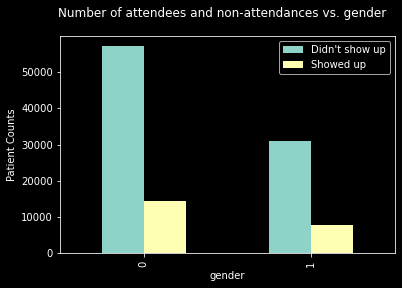

In [93]:
g['scheduledday'].unstack().plot(kind='bar',stacked=False)
plt.legend(["Didn't show up",'Showed up']) # Drawing features
plt.suptitle('Number of attendees and non-attendances vs. gender')
plt.ylabel('Patient Counts') 

##### Outcomes:

>- We can observe that in the plot, the attendance rate of those that did not show up in females is higher than males while the rate of those that showed up in females is also higher than males
 

### Research Question 4 (What factors are directly associated with aging?)

In [94]:
# The association between age and the other factors in the dataset is examined.
df.corrwith(df['age'])

gender          -0.106546
age              1.000000
scholarship     -0.090989
hypertension     0.502850
diabetes         0.294592
alcoholism       0.097842
handicapped      0.075310
sms_received     0.014016
no_show         -0.060934
time_diff        0.034342
time_duration    0.034342
dtype: float64

In [101]:
df.groupby('diabetes').age.mean()

diabetes
0    35.051736
1    61.242700
Name: age, dtype: float64

In [102]:
df.groupby('hypertension').age.mean()

hypertension
0    31.235057
1    60.306848
Name: age, dtype: float64

In [103]:
df.groupby('scholarship').age.mean()

scholarship
0    37.621969
1    30.616242
Name: age, dtype: float64

In [104]:
df.groupby('alcoholism').age.mean()

alcoholism
0    36.533474
1    49.593750
Name: age, dtype: float64

##### Outcomes:

>- We can observe from the data that aging is strongly linked to hypertension and diabetes. While having a scholarship is poorly connected to age.

<a id='conclusions'></a>
## Conclusions


>###  This analysis, provided answer to these questions:
>####     Q1) What information do we need to know to anticipate if a patient will show up for their planned appointment?
    I investigated the relationship between missing an appointment and the other factors in the dataset.

 We also generated a graphic to indicate where the patients were most likely not to show up and where they were most likely to show up.


>####     Q2) Is it true that receiving an SMS as a reminder influences whether or not a patient shows up?
    Age is closely connected to the amount of SMS messages received and the time difference.

Finally, we may deduce that adolescents received more SMS than the others, and that 13 percent or 14 percent of early elders(60-69) and elders did not get SMS. They did, however, show up for their appointments. They are demonstrating that they are more worried about their health than the rest of the population.


>####     Q3) In comparison to women, how often do males visit hospitals? Which one is most likely to appear?
    I first, had the data grouped by gender and no_show, finally I had it plotted to discover the relationship between male and female showing up or not.

 The attendance rate of those who did not show up in females is greater than men in the plot, but the rate of those who did show up in females is also higher than males.


 >####    Q4) What factors are directly associated with aging?
    I examined the association between age and the other factors in the dataset using df.corrwith().

The evidence shows that aging is highly associated with hypertension and diabetes. While obtaining a scholarship has little to do with age.

In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

# LIMITATIONS

1. We can't be certain of the response because the data doesn't specify when the SMS was sent! Perhaps this information will reveal more and will require improvement.

2. Single center, only one year of data

# REFERENCES

https://www.myagecalculator.com/blog/life-stages-and-age-groups-40

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6243417/

https://github.com/AmmarJawad/No-show-Medical-Appointments_Kaggle-dataset/blob/master/project_submission.ipynb